In [67]:
import pandas as pd
import sweetviz as sv
import os.path as path

In [68]:
work_dir = path.abspath(path.join(os.getcwd(),"../data/01_raw/"))

In [69]:
df = pd.read_csv(work_dir + '/penal_df.csv')

In [70]:
my_report = sv.analyze(df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

:FEATURES DONE:                    |█████████████████████| [100%]   00:10  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:24  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [37]:
df.exp_anio.value_counts()

2019    15492
2018     8610
2016     7121
2017     5911
2015        2
Name: exp_anio, dtype: int64

In [38]:
df.oju_descr.value_counts().head(20)

149 BIS - AMENAZAS                                                                                                        6131
149 BIS  - AMENAZAS - CP (P/ L 2303)                                                                                      5108
183 - DAÑOS                                                                                                               3241
128 1 PARR - DELITOS ATINENTES A LA PORNOGRAFIA (PRODUCIR/PUBLICAR IMAGENES PORNOGR. C MENORES 18)                        2800
89  - LESIONES LEVES                                                                                                      1989
128 1 PARR - DELITOS ATINENTES A LA PORNOGRAFIA (PRODUCIR/PUBLICAR IMAGENES PORNOGR. C MENORES 18) CP (P/ L 2303)         1886
239  - RESISTENCIA O DESOBEDIENCIA A LA AUTORIDAD                                                                         1554
5 C - COMERCIO DE ESTUPEFACIENTES O CUALQUIER MATERIA PRIMA PARA SU PRODUCCIÓN /TENENCIA CON FINES DE COMERCIAL

**A continuación, se agrupan los tipos de delitos en categorías**

In [39]:
categoria_delitos = []
articulo_codigo_penal = [] #puede ser código penal o alguna ley nacional.
pena_estimada = [] #promedio de meses

for i in df.oju_descr:
    
    if '149 BIS' in i:
        categoria_delitos.append('Amenazas')
        articulo_codigo_penal.append('149 BIS')
        pena_estimada.append(15)
    
    elif '183' in i:
        categoria_delitos.append('Daños')
        articulo_codigo_penal.append('183')
        pena_estimada.append(6)
    
    elif '128 1' in i:
        categoria_delitos.append('Pornografia infantil')
        articulo_codigo_penal.append('128')
        pena_estimada.append(54)
    
    elif '89' in i:
        categoria_delitos.append('Lesiones leves')
        articulo_codigo_penal.append('89')
        pena_estimada.append(6)
    
    elif '239' in i:
        categoria_delitos.append('Resistencia a la autoridad')
        articulo_codigo_penal.append('239')
        pena_estimada.append(6)
    
    elif '5 C' in i:
        categoria_delitos.append('Comercio de estupefacientes')
        articulo_codigo_penal.append('5 C')
        pena_estimada.append(21)
    
    elif '14 1' in i or '14 2' in i:
        categoria_delitos.append('Tenencia de estupefacientes')
        articulo_codigo_penal.append('14 1')
        pena_estimada.append(12)
    
    elif '92' in i:
        categoria_delitos.append('Lesiones graves')
        articulo_codigo_penal.append('92')
        pena_estimada.append(24)
    
    elif '292 1' in i or '296' in i:
        categoria_delitos.append('Falsificacion DNI')
        articulo_codigo_penal.append('292')
        pena_estimada.append(42)  
        
    elif '292 2°PARR' in i:
        categoria_delitos.append('Falsificacion documento privado')
        articulo_codigo_penal.append('292')
        pena_estimada.append(15)  
        
    elif 'INCUMPLIMIENTO DE LOS DEBERES DE ASISTENCIA FAMILIAR' in i or '1 - LN 13.944 ' in i:
        categoria_delitos.append('Incumplimiento asistencia familiar')
        articulo_codigo_penal.append('13.944')
        pena_estimada.append(12) 
        
    elif '181 INC. 1'in i:
        categoria_delitos.append('Usurpacion')
        articulo_codigo_penal.append('181')
        pena_estimada.append(22)   
    
    elif 'PRESUNTA COMISION DELITO' in i:
        categoria_delitos.append('Presunta comision delito')
        articulo_codigo_penal.append('nan')
        pena_estimada.append(0)   
    
    elif '301BIS' in i:
        categoria_delitos.append('Apuestas ilegales')
        articulo_codigo_penal.append('301 BIS')
        pena_estimada.append(44)   
    
    elif '94  -' in i:
        categoria_delitos.append('Lesiones culposas')
        articulo_codigo_penal.append('94')
        pena_estimada.append(18)          
    
    elif '1 1er párr' in i:
        categoria_delitos.append('Impedimento de contacto de menor con padre no conviviente')
        articulo_codigo_penal.append('2470')
        pena_estimada.append(6)    
    
    elif '237  - ' in i:
        categoria_delitos.append('Atentado contra la autoridad')
        articulo_codigo_penal.append('237')
        pena_estimada.append(6)
        
    elif '150' in i:
        categoria_delitos.append('Violacion de domicilio')
        articulo_codigo_penal.append('150')
        pena_estimada.append(15)
    
    elif '189 BIS' in i:
        categoria_delitos.append('Posesion de arma de fuego')
        articulo_codigo_penal.append('189 BIS (2)')
        pena_estimada.append(15)
    
    elif '131' in i:
        categoria_delitos.append('Grooming')
        articulo_codigo_penal.append('131')
        pena_estimada.append(27)
    
    else:
        categoria_delitos.append('otros')
        articulo_codigo_penal.append('otros')
        pena_estimada.append(0)
        
    

In [40]:
import numpy as np

def join_categoria(df):
    
    df_cat_delitos = pd.DataFrame(np.column_stack([categoria_delitos, articulo_codigo_penal, pena_estimada]), 
                                  columns = ['descripcion_delitos', 'articulo_codigo_penal','pena_estimada'])
    df_nuevo = df.join(df_cat_delitos, how = 'right')
    
    return df_nuevo

df = join_categoria(df)

In [41]:
df.descripcion_delitos.value_counts().head(6)

Amenazas                      11239
otros                          4775
Pornografia infantil           4686
Lesiones leves                 3725
Daños                          3304
Resistencia a la autoridad     1554
Name: descripcion_delitos, dtype: int64

In [42]:
def filtrar_año(df,año):
    
    df_filtrado = df[df.exp_anio == año]
    df_filtrado.reset_index(drop = True, inplace = True)
    
    return df_filtrado

df_2019 = filtrar_año(df,2019)
df_2018 = filtrar_año(df,2018)


In [43]:
df_18_19 = df[df.exp_anio > 2017]
df_18_19.reset_index(drop = True, inplace = True)

In [44]:
df_16_17 = df[df.exp_anio < 2018]
df_16_17.reset_index(drop = True, inplace = True)

In [45]:
def filtrar_dataframe(df):
    
    df_juzgados_delitos = df[['org_descorta_pri', 'descripcion_delitos']]
    
    return df_juzgados_delitos

df_juzgados_delitos_19 = filtrar_dataframe(df_18_19)

In [46]:
def agrupando_datos(df, juzgado, nombre_columna):

    df = df_juzgados_delitos_19[df_juzgados_delitos_19.org_descorta_pri == juzgado]
    df = df.groupby('descripcion_delitos').count().reset_index()
    df.rename(columns = {'org_descorta_pri' : nombre_columna}, inplace = True)
    return df

In [47]:
juz1 = agrupando_datos(df_18_19, 'JUZGADO N°1', 'Juzgado_1')
juz2 = agrupando_datos(df_18_19, 'JUZGADO N°2', 'Juzgado_2')
juz3 = agrupando_datos(df_18_19, 'JUZGADO N°3', 'Juzgado_3')
juz4 = agrupando_datos(df_18_19, 'JUZGADO N°4', 'Juzgado_4')
juz5 = agrupando_datos(df_18_19, 'JUZGADO N°5', 'Juzgado_5')
juz6 = agrupando_datos(df_18_19, 'JUZGADO N°6', 'Juzgado_6')
juz7 = agrupando_datos(df_18_19, 'JUZGADO N°7', 'Juzgado_7')
juz8 = agrupando_datos(df_18_19, 'JUZGADO N°8', 'Juzgado_8')
juz9 = agrupando_datos(df_18_19, 'JUZGADO N°9', 'Juzgado_9')
juz10 = agrupando_datos(df_18_19, 'JUZGADO N°10', 'Juzgado_10')
juz11 = agrupando_datos(df_18_19, 'JUZGADO N°11', 'Juzgado_11')
juz12 = agrupando_datos(df_18_19, 'JUZGADO N°12', 'Juzgado_12')
juz13 = agrupando_datos(df_18_19, 'JUZGADO N°13', 'Juzgado_13')
juz14 = agrupando_datos(df_18_19, 'JUZGADO N°14', 'Juzgado_14')
juz15 = agrupando_datos(df_18_19, 'JUZGADO N°15', 'Juzgado_15')
juz16 = agrupando_datos(df_18_19, 'JUZGADO N°16', 'Juzgado_16')
juz17 = agrupando_datos(df_18_19, 'JUZGADO N°17', 'Juzgado_17')
juz18 = agrupando_datos(df_18_19, 'JUZGADO N°18', 'Juzgado_18')
juz19 = agrupando_datos(df_18_19, 'JUZGADO N°19', 'Juzgado_19')
juz20 = agrupando_datos(df_18_19, 'JUZGADO N°20', 'Juzgado_20')
juz21 = agrupando_datos(df_18_19, 'JUZGADO N°21', 'Juzgado_21')
juz22 = agrupando_datos(df_18_19, 'JUZGADO N°22', 'Juzgado_22')
juz23 = agrupando_datos(df_18_19, 'JUZGADO N°23', 'Juzgado_23')
juz24 = agrupando_datos(df_18_19, 'JUZGADO N°24', 'Juzgado_24')
juz25 = agrupando_datos(df_18_19, 'JUZGADO N°25', 'Juzgado_25')
juz26 = agrupando_datos(df_18_19, 'JUZGADO N°26', 'Juzgado_26')
juz27 = agrupando_datos(df_18_19, 'JUZGADO N°27', 'Juzgado_27')
juz28 = agrupando_datos(df_18_19, 'JUZGADO N°28', 'Juzgado_28')
juz29 = agrupando_datos(df_18_19, 'JUZGADO N°29', 'Juzgado_29')
juz30 = agrupando_datos(df_18_19, 'JUZGADO N°30', 'Juzgado_30')
juz31 = agrupando_datos(df_18_19, 'JUZGADO N°31', 'Juzgado_31')



In [48]:
from functools import reduce


dataframes = [juz1,juz2,juz3,juz4,juz5,juz6,juz7,juz8,juz9,juz10,juz11,juz12,juz13,juz14,juz15,juz16,juz17,juz18,juz19,juz20,juz21,juz22,juz23,juz24,juz25
              ,juz26,juz27,juz28,juz29,
              juz30,juz31]

df_agrupado_18_19 = reduce(lambda  left,right: pd.merge(left,right,on=['descripcion_delitos'],
                                            how='outer'), dataframes)

In [49]:
df_pena_18_19 = df_18_19[['descripcion_delitos', 'pena_estimada']].drop_duplicates()
df_agrupado_18_19 = df_agrupado_18_19.merge(df_pena_18_19, on = 'descripcion_delitos', how = 'left')
df_agrupado_18_19['pena_estimada'] = df_agrupado_18_19['pena_estimada'].astype(int)

In [50]:
df_agrupado_18_19.loc[len(df_agrupado_18_19),'descripcion_delitos'] = 'Total'
df_agrupado_18_19.iloc[19,1:] = df_agrupado_18_19.sum(axis = 0)
df_agrupado_18_19

,descripcion_delitos,Juzgado_1,Juzgado_2,Juzgado_3,Juzgado_4,Juzgado_5,Juzgado_6,Juzgado_7,Juzgado_8,Juzgado_9,...,Juzgado_23,Juzgado_24,Juzgado_25,Juzgado_26,Juzgado_27,Juzgado_28,Juzgado_29,Juzgado_30,Juzgado_31,pena_estimada
0,Amenazas,140.0,137.0,226.0,161.0,129.0,202.0,150.0,183.0,178.0,...,159.0,204.0,151.0,174.0,176.0,181.0,195.0,171.0,160.0,15.0
1,Apuestas ilegales,24.0,4.0,10.0,4.0,26.0,7.0,7.0,2.0,1.0,...,8.0,11.0,21.0,5.0,8.0,13.0,2.0,NaN,4.0,44.0
2,Atentado contra la autoridad,9.0,8.0,19.0,14.0,6.0,10.0,6.0,8.0,18.0,...,18.0,9.0,10.0,4.0,25.0,15.0,16.0,8.0,12.0,6.0
3,Comercio de estupefacientes,29.0,24.0,17.0,34.0,11.0,52.0,23.0,38.0,44.0,...,44.0,24.0,27.0,45.0,21.0,25.0,34.0,53.0,22.0,21.0
4,Daños,37.0,29.0,66.0,51.0,37.0,61.0,46.0,41.0,58.0,...,48.0,64.0,50.0,32.0,60.0,64.0,63.0,65.0,49.0,6.0
5,Falsificacion DNI,7.0,16.0,18.0,13.0,7.0,6.0,17.0,13.0,11.0,...,8.0,4.0,13.0,14.0,8.0,5.0,12.0,8.0,22.0,42.0
6,Grooming,10.0,6.0,7.0,4.0,6.0,8.0,6.0,5.0,5.0,...,3.0,2.0,5.0,5.0,4.0,12.0,4.0,6.0,8.0,27.0
7,Impedimento de contacto de menor con padre no ...,5.0,6.0,9.0,12.0,6.0,9.0,6.0,10.0,20.0,...,16.0,23.0,19.0,6.0,9.0,14.0,9.0,12.0,23.0,6.0
8,Incumplimiento asistencia familiar,13.0,14.0,20.0,18.0,11.0,13.0,12.0,22.0,11.0,...,13.0,20.0,16.0,26.0,21.0,22.0,17.0,25.0,26.0,12.0
9,Lesiones culposas,5.0,6.0,11.0,14.0,5.0,31.0,10.0,8.0,17.0,...,22.0,17.0,14.0,6.0,18.0,18.0,16.0,14.0,15.0,18.0


In [51]:
df_juzgados_delitos_17 = filtrar_dataframe(df_16_17)

def agrupando_datos(df, juzgado, nombre_columna):

    df = df_juzgados_delitos_17[df_juzgados_delitos_17.org_descorta_pri == juzgado]
    df = df.groupby('descripcion_delitos').count().reset_index()
    df.rename(columns = {'org_descorta_pri' : nombre_columna}, inplace = True)
    return df

juz1 = agrupando_datos(df_16_17, 'JUZGADO N°1', 'Juzgado_1')
juz2 = agrupando_datos(df_16_17, 'JUZGADO N°2', 'Juzgado_2')
juz3 = agrupando_datos(df_16_17, 'JUZGADO N°3', 'Juzgado_3')
juz4 = agrupando_datos(df_16_17, 'JUZGADO N°4', 'Juzgado_4')
juz5 = agrupando_datos(df_16_17, 'JUZGADO N°5', 'Juzgado_5')
juz6 = agrupando_datos(df_16_17, 'JUZGADO N°6', 'Juzgado_6')
juz7 = agrupando_datos(df_16_17, 'JUZGADO N°7', 'Juzgado_7')
juz8 = agrupando_datos(df_16_17, 'JUZGADO N°8', 'Juzgado_8')
juz9 = agrupando_datos(df_16_17, 'JUZGADO N°9', 'Juzgado_9')
juz10 = agrupando_datos(df_16_17, 'JUZGADO N°10', 'Juzgado_10')
juz11 = agrupando_datos(df_16_17, 'JUZGADO N°11', 'Juzgado_11')
juz12 = agrupando_datos(df_16_17, 'JUZGADO N°12', 'Juzgado_12')
juz13 = agrupando_datos(df_16_17, 'JUZGADO N°13', 'Juzgado_13')
juz14 = agrupando_datos(df_16_17, 'JUZGADO N°14', 'Juzgado_14')
juz15 = agrupando_datos(df_16_17, 'JUZGADO N°15', 'Juzgado_15')
juz16 = agrupando_datos(df_16_17, 'JUZGADO N°16', 'Juzgado_16')
juz17 = agrupando_datos(df_16_17, 'JUZGADO N°17', 'Juzgado_17')
juz18 = agrupando_datos(df_16_17, 'JUZGADO N°18', 'Juzgado_18')
juz19 = agrupando_datos(df_16_17, 'JUZGADO N°19', 'Juzgado_19')
juz20 = agrupando_datos(df_16_17, 'JUZGADO N°20', 'Juzgado_20')
juz21 = agrupando_datos(df_16_17, 'JUZGADO N°21', 'Juzgado_21')
juz22 = agrupando_datos(df_16_17, 'JUZGADO N°22', 'Juzgado_22')
juz23 = agrupando_datos(df_16_17, 'JUZGADO N°23', 'Juzgado_23')
juz24 = agrupando_datos(df_16_17, 'JUZGADO N°24', 'Juzgado_24')
juz25 = agrupando_datos(df_16_17, 'JUZGADO N°25', 'Juzgado_25')
juz26 = agrupando_datos(df_16_17, 'JUZGADO N°26', 'Juzgado_26')
juz27 = agrupando_datos(df_16_17, 'JUZGADO N°27', 'Juzgado_27')
juz28 = agrupando_datos(df_16_17, 'JUZGADO N°28', 'Juzgado_28')
juz29 = agrupando_datos(df_16_17, 'JUZGADO N°29', 'Juzgado_29')
juz30 = agrupando_datos(df_16_17, 'JUZGADO N°30', 'Juzgado_30')
juz31 = agrupando_datos(df_16_17, 'JUZGADO N°31', 'Juzgado_31')


In [52]:
dataframes = [juz1,juz2,juz3,juz4,juz5,juz6,juz7,juz8,juz9,juz10,juz11,juz12,juz13,juz14,juz15,juz16,juz17,juz18,juz19,juz20,juz21,juz22,juz23,juz24,juz25
              ,juz26,juz27,juz28,juz29,
              juz30,juz31]

df_agrupado_16_17 = reduce(lambda  left,right: pd.merge(left,right,on=['descripcion_delitos'],
                                            how='outer'), dataframes)

In [53]:
df_pena_16_17 = df_16_17[['descripcion_delitos', 'pena_estimada']].drop_duplicates()
df_agrupado_16_17 = df_agrupado_16_17.merge(df_pena_16_17, on = 'descripcion_delitos', how = 'left')
df_agrupado_16_17['pena_estimada'] = df_agrupado_16_17['pena_estimada'].astype(int)

In [54]:
df_agrupado_16_17.loc[len(df_agrupado_16_17),'descripcion_delitos'] = 'Total'
df_agrupado_16_17.iloc[14,1:] = df_agrupado_16_17.sum(axis = 0)
df_agrupado_16_17

,descripcion_delitos,Juzgado_1,Juzgado_2,Juzgado_3,Juzgado_4,Juzgado_5,Juzgado_6,Juzgado_7,Juzgado_8,Juzgado_9,...,Juzgado_23,Juzgado_24,Juzgado_25,Juzgado_26,Juzgado_27,Juzgado_28,Juzgado_29,Juzgado_30,Juzgado_31,pena_estimada
0,Amenazas,229.0,190.0,302.0,178.0,224.0,175.0,213.0,204.0,184.0,...,190.0,174.0,208.0,188.0,201.0,164.0,163.0,161.0,155.0,15.0
1,Apuestas ilegales,5.0,4.0,2.0,NaN,NaN,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,44.0
2,Daños,55.0,46.0,101.0,59.0,80.0,59.0,58.0,58.0,53.0,...,59.0,64.0,48.0,34.0,62.0,63.0,40.0,53.0,57.0,6.0
3,Incumplimiento asistencia familiar,23.0,9.0,17.0,12.0,20.0,7.0,14.0,20.0,10.0,...,9.0,12.0,14.0,16.0,16.0,10.0,11.0,12.0,15.0,12.0
4,Lesiones culposas,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
5,Lesiones graves,2.0,1.0,1.0,NaN,NaN,2.0,2.0,NaN,2.0,...,NaN,1.0,3.0,1.0,1.0,1.0,NaN,5.0,NaN,24.0
6,Lesiones leves,21.0,20.0,26.0,7.0,13.0,10.0,19.0,15.0,8.0,...,8.0,10.0,16.0,13.0,11.0,10.0,9.0,4.0,7.0,6.0
7,Pornografia infantil,35.0,16.0,99.0,104.0,33.0,95.0,24.0,34.0,62.0,...,86.0,69.0,65.0,40.0,30.0,108.0,80.0,92.0,91.0,54.0
8,Presunta comision delito,6.0,6.0,9.0,10.0,5.0,10.0,12.0,3.0,9.0,...,6.0,6.0,1.0,11.0,6.0,6.0,9.0,10.0,6.0,0.0
9,Usurpacion,27.0,19.0,25.0,14.0,17.0,16.0,21.0,21.0,10.0,...,11.0,20.0,23.0,22.0,12.0,15.0,14.0,8.0,4.0,22.0


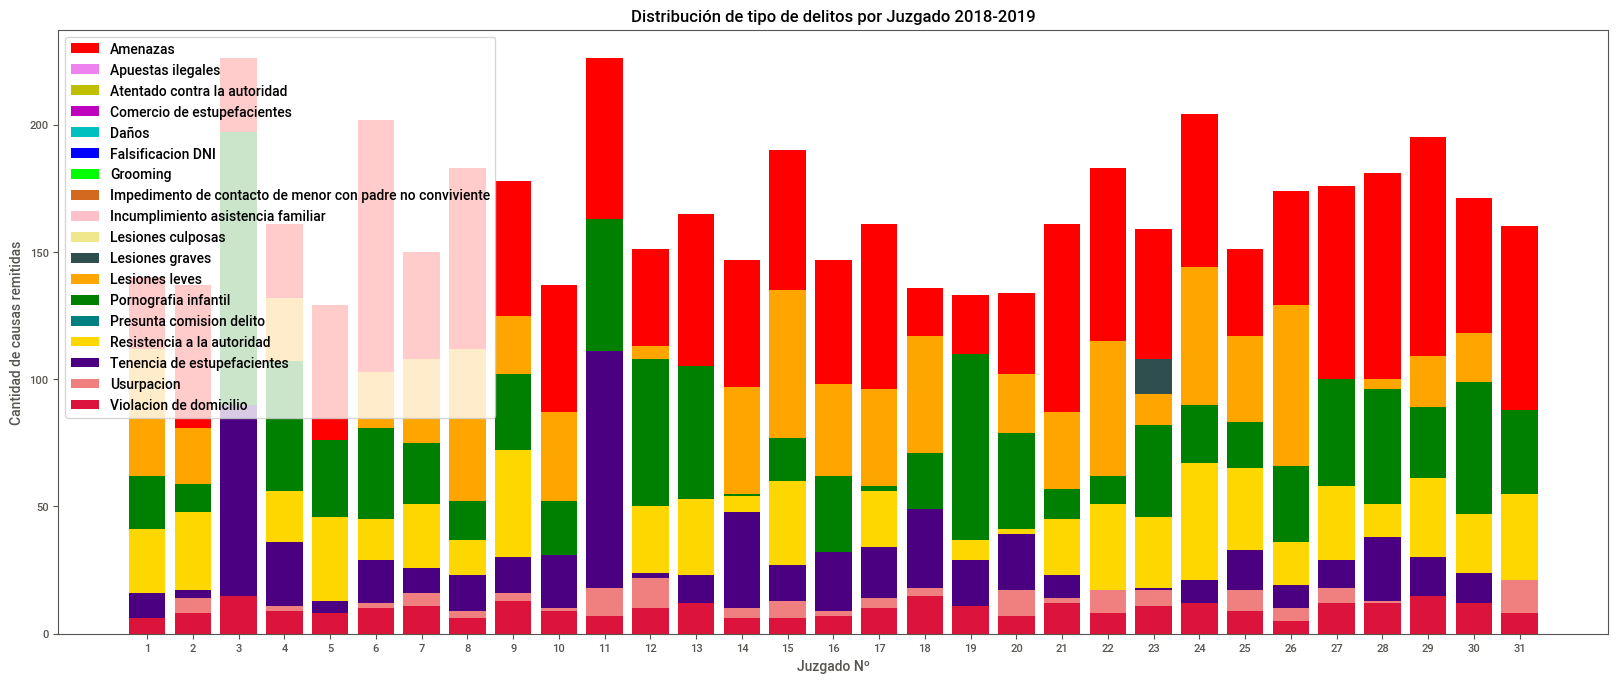

In [55]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,32,1)


fig, ax = plt.subplots(figsize=(20, 8))

labels = df_agrupado_18_19.loc[:17,'descripcion_delitos'].values

graph0 = plt.bar(x,df_agrupado_18_19.iloc[0,1:-1].values, color = 'r', width = 0.8)
graph1 = plt.bar(x,df_agrupado_18_19.iloc[1,1:-1].values, color = 'violet', width = 0.8,)
graph2 = plt.bar(x,df_agrupado_18_19.iloc[2,1:-1].values, color = 'y', width = 0.8)
graph3 = plt.bar(x,df_agrupado_18_19.iloc[3,1:-1].values, color = 'm', width = 0.8)
graph4 = plt.bar(x,df_agrupado_18_19.iloc[4,1:-1].values, color = 'c', width = 0.8)
graph5 = plt.bar(x,df_agrupado_18_19.iloc[5,1:-1].values, color = 'b', width = 0.8)
graph6 = plt.bar(x,df_agrupado_18_19.iloc[6,1:-1].values, color = 'lime', width = 0.8)
graph7 = plt.bar(x,df_agrupado_18_19.iloc[7,1:-1].values, color = 'chocolate', width = 0.8)
graph8 = plt.bar(x,df_agrupado_18_19.iloc[8,1:-1].values, color = 'pink', width = 0.8)
graph9 = plt.bar(x,df_agrupado_18_19.iloc[9,1:-1].values, color = 'khaki', width = 0.8)
graph10 = plt.bar(x,df_agrupado_18_19.iloc[10,1:-1].values, color = 'darkslategrey', width = 0.8)
graph11 = plt.bar(x,df_agrupado_18_19.iloc[11,1:-1].values, color = 'orange', width = 0.8)
graph12 = plt.bar(x,df_agrupado_18_19.iloc[12,1:-1].values, color = 'g', width = 0.8)
graph13 = plt.bar(x,df_agrupado_18_19.iloc[13,1:-1].values, color = 'teal', width = 0.8)
graph14 = plt.bar(x,df_agrupado_18_19.iloc[14,1:-1].values, color = 'gold', width = 0.8)
graph15 = plt.bar(x,df_agrupado_18_19.iloc[15,1:-1].values, color = 'indigo', width = 0.8)
graph16 = plt.bar(x,df_agrupado_18_19.iloc[16,1:-1].values, color = 'lightcoral', width = 0.8)
graph17 = plt.bar(x,df_agrupado_18_19.iloc[17,1:-1].values, color = 'crimson', width = 0.8)


ax.set_title('Distribución de tipo de delitos por Juzgado 2018-2019')
ax.set_ylabel('Cantidad de causas remitidas')
ax.set_xlabel('Juzgado Nº')
ax.set_xticks(x)
plt.legend(labels = labels)

plt.show()

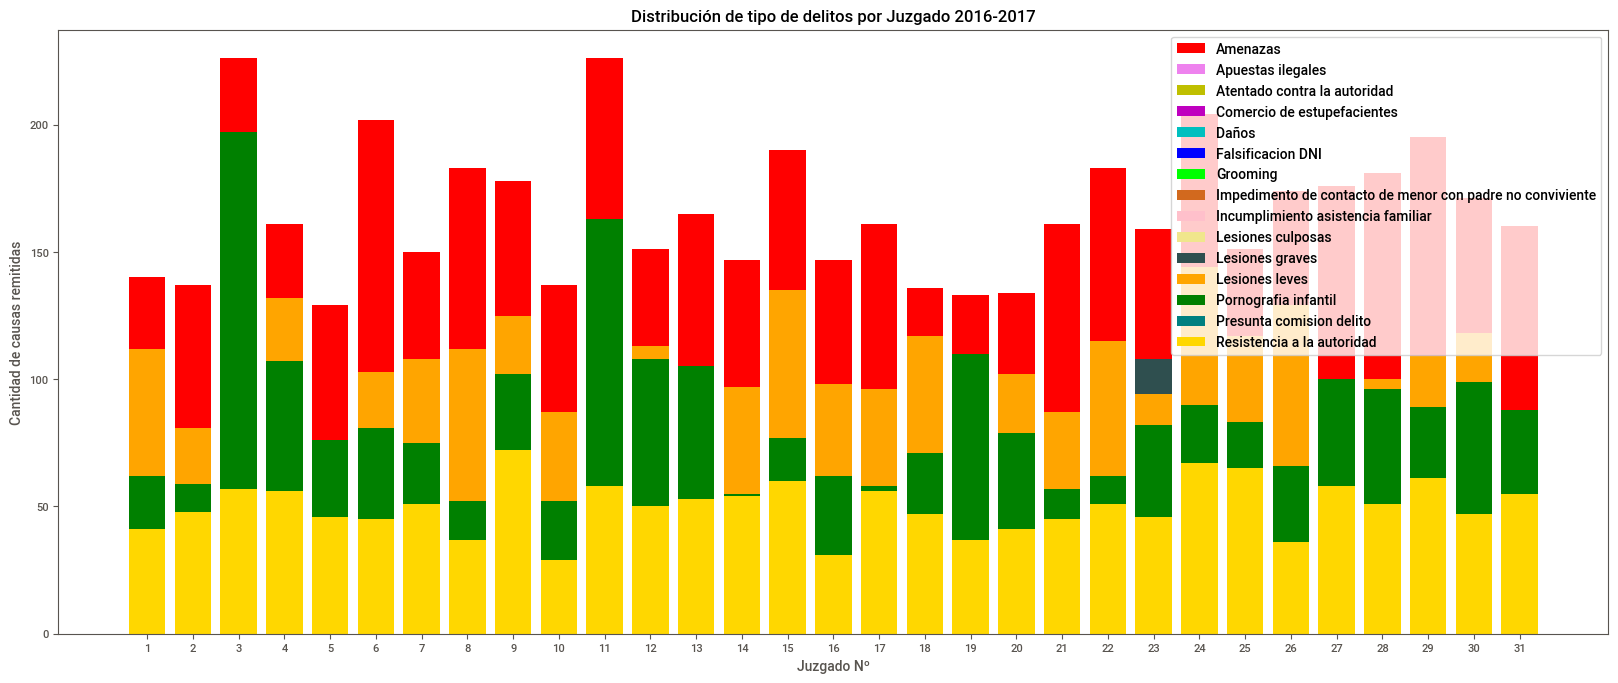

In [56]:
x = np.arange(1,32,1)


fig, ax = plt.subplots(figsize=(20, 8))

labels = df_agrupado_18_19.loc[:14,'descripcion_delitos'].values

graph0 = plt.bar(x,df_agrupado_18_19.iloc[0,1:-1].values, color = 'r', width = 0.8)
graph1 = plt.bar(x,df_agrupado_18_19.iloc[1,1:-1].values, color = 'violet', width = 0.8,)
graph2 = plt.bar(x,df_agrupado_18_19.iloc[2,1:-1].values, color = 'y', width = 0.8)
graph3 = plt.bar(x,df_agrupado_18_19.iloc[3,1:-1].values, color = 'm', width = 0.8)
graph4 = plt.bar(x,df_agrupado_18_19.iloc[4,1:-1].values, color = 'c', width = 0.8)
graph5 = plt.bar(x,df_agrupado_18_19.iloc[5,1:-1].values, color = 'b', width = 0.8)
graph6 = plt.bar(x,df_agrupado_18_19.iloc[6,1:-1].values, color = 'lime', width = 0.8)
graph7 = plt.bar(x,df_agrupado_18_19.iloc[7,1:-1].values, color = 'chocolate', width = 0.8)
graph8 = plt.bar(x,df_agrupado_18_19.iloc[8,1:-1].values, color = 'pink', width = 0.8)
graph9 = plt.bar(x,df_agrupado_18_19.iloc[9,1:-1].values, color = 'khaki', width = 0.8)
graph10 = plt.bar(x,df_agrupado_18_19.iloc[10,1:-1].values, color = 'darkslategrey', width = 0.8)
graph11 = plt.bar(x,df_agrupado_18_19.iloc[11,1:-1].values, color = 'orange', width = 0.8)
graph12 = plt.bar(x,df_agrupado_18_19.iloc[12,1:-1].values, color = 'g', width = 0.8)
graph13 = plt.bar(x,df_agrupado_18_19.iloc[13,1:-1].values, color = 'teal', width = 0.8)
graph14 = plt.bar(x,df_agrupado_18_19.iloc[14,1:-1].values, color = 'gold', width = 0.8)

ax.set_title('Distribución de tipo de delitos por Juzgado 2016-2017')
ax.set_ylabel('Cantidad de causas remitidas')
ax.set_xlabel('Juzgado Nº')
ax.set_xticks(x)
plt.legend(labels = labels)

plt.show()


**Vamos a analizar cómo están distribuidas por sobre el total de causas de cada juzgado aquellas con penas más graves**

In [57]:
df_agrupado_18_19[['descripcion_delitos','pena_estimada']].sort_values(by = 'pena_estimada', ascending = False)

,descripcion_delitos,pena_estimada
19,Total,336.0
12,Pornografia infantil,54.0
1,Apuestas ilegales,44.0
5,Falsificacion DNI,42.0
6,Grooming,27.0
10,Lesiones graves,24.0
16,Usurpacion,22.0
3,Comercio de estupefacientes,21.0
9,Lesiones culposas,18.0
17,Violacion de domicilio,15.0


In [58]:
import seaborn as sns

pornografia = (df_agrupado_18_19.iloc[12,1:-1] / df_agrupado_18_19.iloc[19,1:-1]) *100
apuestas_ilegales = (df_agrupado_18_19.iloc[1,1:-1] / df_agrupado_18_19.iloc[19,1:-1]) *100 
falsificacion_dni = (df_agrupado_18_19.iloc[5,1:-1] / df_agrupado_18_19.iloc[19,1:-1]) * 100
grooming = (df_agrupado_18_19.iloc[6,1:-1] / df_agrupado_18_19.iloc[19,1:-1]) *100
lesiones_graves = (df_agrupado_18_19.iloc[10,1:-1] / df_agrupado_18_19.iloc[19,1:-1]) * 100 

amenazas = (df_agrupado_18_19.iloc[0,1:-1] / df_agrupado_18_19.iloc[19,1:-1]) * 100 

def bar_plot(delito):
    x = np.arange(1,32,1)

    fig, ax = plt.subplots(figsize=(20, 8))
    fig = plt.bar(x,delito, color = 'b', width = 0.8)
    ax.set_title('Distribucion de causas sobre el total durante 2018 - 2019 asociadas a:')
    ax.set_ylabel('Cantidad de causas en %')
    ax.set_xlabel('Juzgado Nº')
    x_ticks = ax.set_xticks(x)
    
    plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [59]:
bar_plot(falsificacion_dni)

NameError: name 'bar_plot' is not defined

In [60]:
bar_plot(grooming)

NameError: name 'bar_plot' is not defined

In [61]:
df_agrupado_16_17

,descripcion_delitos,Juzgado_1,Juzgado_2,Juzgado_3,Juzgado_4,Juzgado_5,Juzgado_6,Juzgado_7,Juzgado_8,Juzgado_9,...,Juzgado_23,Juzgado_24,Juzgado_25,Juzgado_26,Juzgado_27,Juzgado_28,Juzgado_29,Juzgado_30,Juzgado_31,pena_estimada
0,Amenazas,229.0,190.0,302.0,178.0,224.0,175.0,213.0,204.0,184.0,...,190.0,174.0,208.0,188.0,201.0,164.0,163.0,161.0,155.0,15.0
1,Apuestas ilegales,5.0,4.0,2.0,NaN,NaN,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,44.0
2,Daños,55.0,46.0,101.0,59.0,80.0,59.0,58.0,58.0,53.0,...,59.0,64.0,48.0,34.0,62.0,63.0,40.0,53.0,57.0,6.0
3,Incumplimiento asistencia familiar,23.0,9.0,17.0,12.0,20.0,7.0,14.0,20.0,10.0,...,9.0,12.0,14.0,16.0,16.0,10.0,11.0,12.0,15.0,12.0
4,Lesiones culposas,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
5,Lesiones graves,2.0,1.0,1.0,NaN,NaN,2.0,2.0,NaN,2.0,...,NaN,1.0,3.0,1.0,1.0,1.0,NaN,5.0,NaN,24.0
6,Lesiones leves,21.0,20.0,26.0,7.0,13.0,10.0,19.0,15.0,8.0,...,8.0,10.0,16.0,13.0,11.0,10.0,9.0,4.0,7.0,6.0
7,Pornografia infantil,35.0,16.0,99.0,104.0,33.0,95.0,24.0,34.0,62.0,...,86.0,69.0,65.0,40.0,30.0,108.0,80.0,92.0,91.0,54.0
8,Presunta comision delito,6.0,6.0,9.0,10.0,5.0,10.0,12.0,3.0,9.0,...,6.0,6.0,1.0,11.0,6.0,6.0,9.0,10.0,6.0,0.0
9,Usurpacion,27.0,19.0,25.0,14.0,17.0,16.0,21.0,21.0,10.0,...,11.0,20.0,23.0,22.0,12.0,15.0,14.0,8.0,4.0,22.0


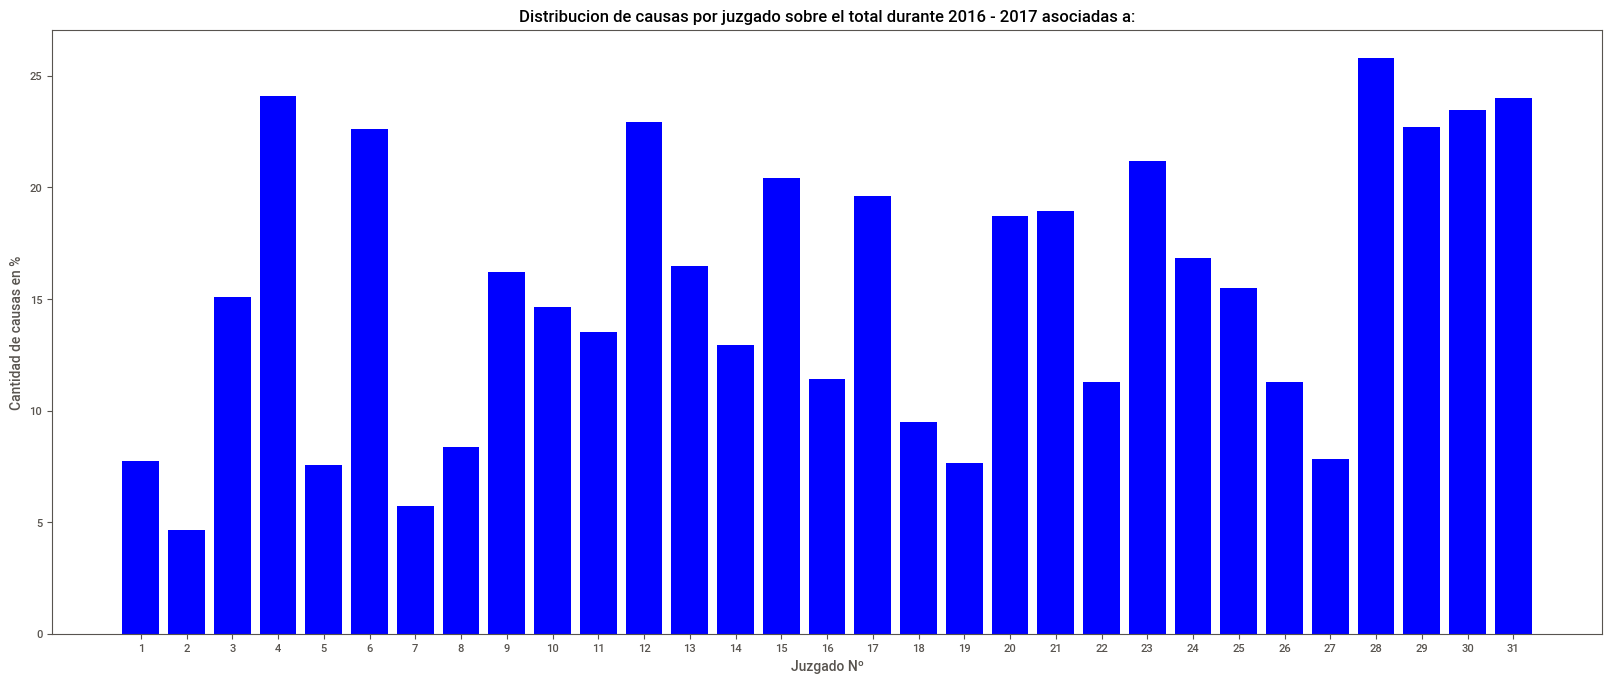

In [62]:
pornografia_16_17 = (df_agrupado_16_17.iloc[7,1:-1] / df_agrupado_16_17.iloc[14,1:-1]) *100
apuestas_ilegales_16_17 = (df_agrupado_16_17.iloc[1,1:-1] / df_agrupado_18_19.iloc[14,1:-1]) *100 


def bar_plot_16(delito):
    x = np.arange(1,32,1)

    fig, ax = plt.subplots(figsize=(20, 8))
    fig = plt.bar(x,delito, color = 'b', width = 0.8)
    ax.set_title('Distribucion de causas por juzgado sobre el total durante 2016 - 2017 asociadas a:')
    ax.set_ylabel('Cantidad de causas en %')
    ax.set_xlabel('Juzgado Nº')
    x_ticks = ax.set_xticks(x)
    
    plt.show()



bar_plot_16(pornografia_16_17)

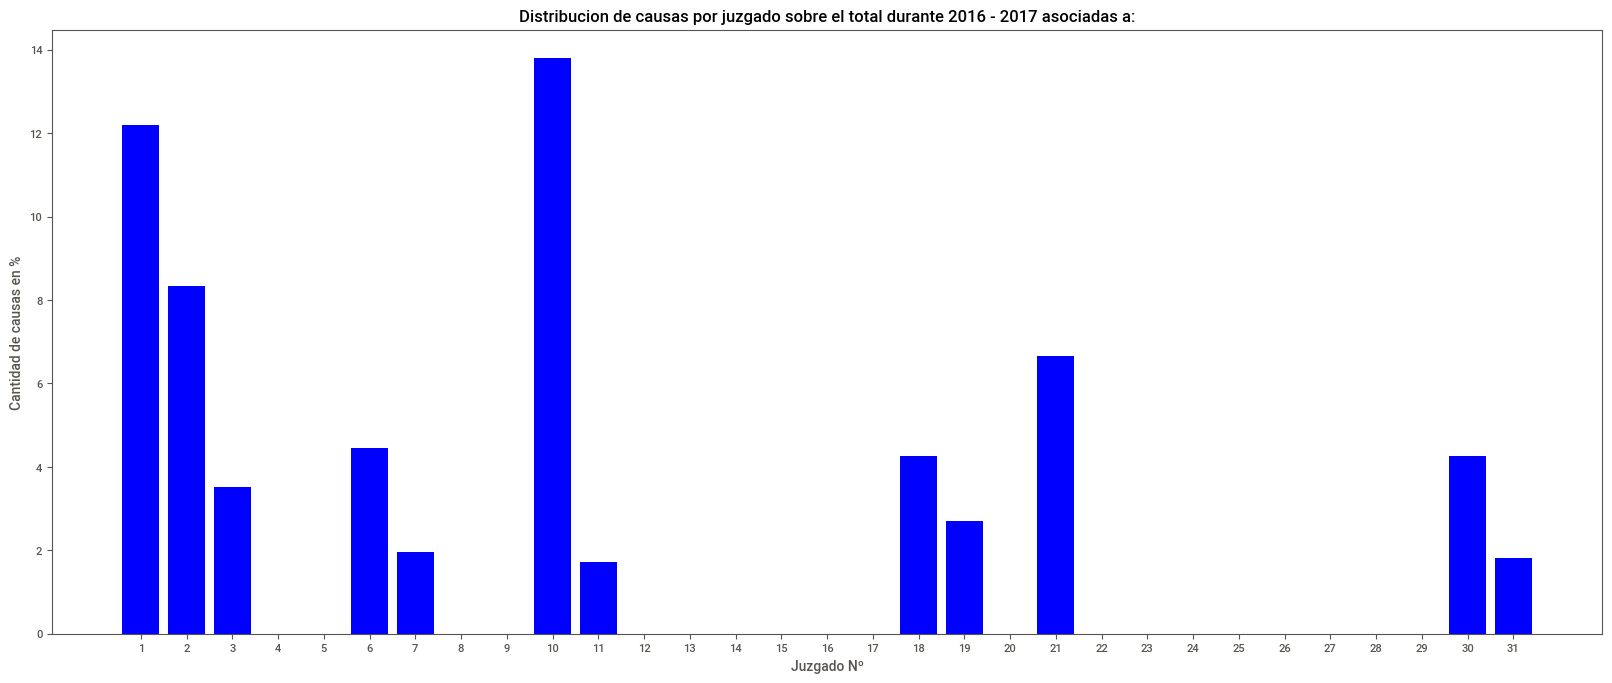

In [63]:
bar_plot_16(apuestas_ilegales_16_17)